In [101]:
import numpy as np

In [102]:
from astropy.io import fits
import reproject
from astropy import convolution
from astropy.convolution import Gaussian2DKernel
from astropy import units as u
from astropy.table import Table
import pyavm

In [103]:
import regions
from astropy import coordinates

In [104]:
import PIL

In [105]:
from spectral_cube import SpectralCube, Projection, Slice

In [106]:
import uvcombine
from astropy import wcs

In [107]:
import scipy.ndimage

In [108]:
import matplotlib
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

In [109]:
import numpy as np

In [110]:
import pylab as pl
from astropy.visualization import simple_norm

In [111]:
basepath = '/orange/adamginsburg/jwst/brick'

In [112]:
rgb = np.array(
      [
       #fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrca.fits'),
       #fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrca.fits'),
       fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrca_destarred6.fits'),
       fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrca_destarred6.fits'),
       fits.getdata(f'{basepath}/images/F410_minus_F405_nrca.fits')
      ]
).swapaxes(0,2).swapaxes(0,1)
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

In [113]:
AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F410_minus_F405_nrca.fits'))
# AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_i2d.fits', ext=['SCI', 1]))

In [114]:
def save_rgb(img, filename):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::-1,:,:])
    img.save(filename)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


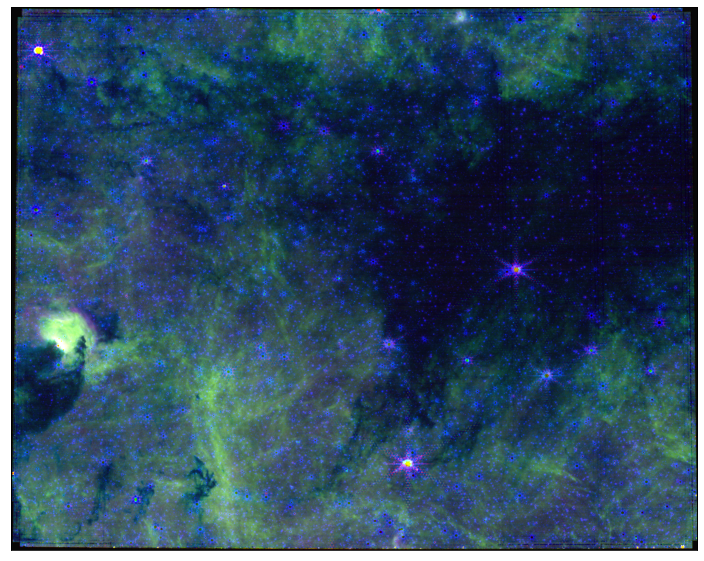

In [115]:
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=100)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-1, max_cut=100)(rgb[:,:,1]),
                       simple_norm(rgb[:,:,2], stretch='asinh', min_cut=-1, max_cut=100)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

#save_rgb(rgb_scaled, "BrickJWST_longwave_RGB_unrotated.png")
#AVM.embed("BrickJWST_longwave_RGB_unrotated.png", "BrickJWST_longwave_RGB_unrotated.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


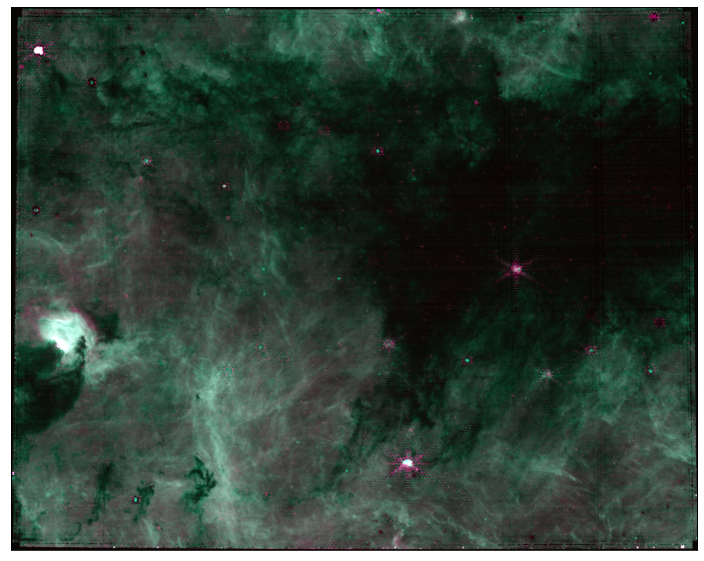

In [116]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-1, max_cut=210)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

#save_rgb(rgb_scaled, "BrickJWST_longwave_RGB_unrotated.png")
#AVM.embed("BrickJWST_longwave_RGB_unrotated.png", "BrickJWST_longwave_RGB_unrotated.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


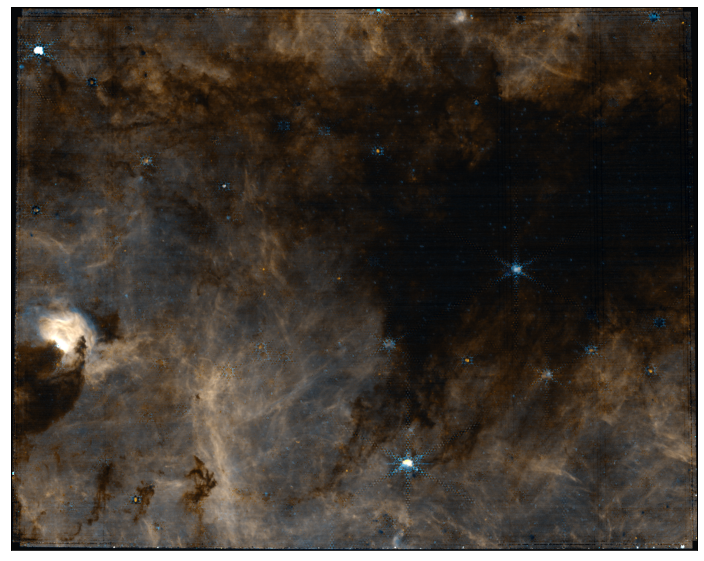

In [117]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-2, max_cut=210)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated.png"
save_rgb(rgb_scaled, outfn)
AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


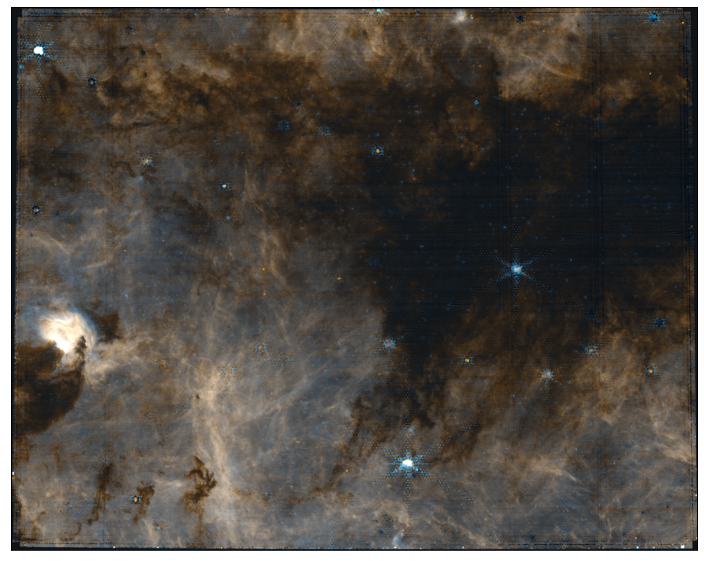

In [118]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-2, max_cut=70)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-2, max_cut=100)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-4, max_cut=170)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png"
save_rgb(rgb_scaled, outfn)
AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


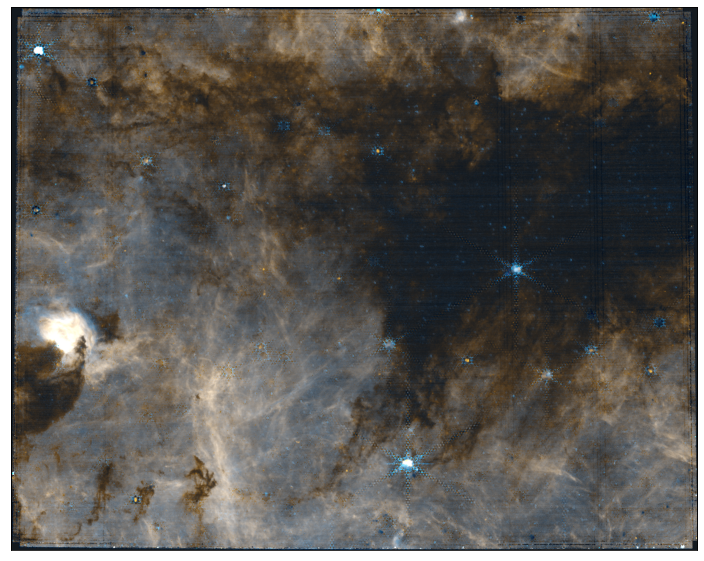

In [119]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-2, max_cut=50)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-2, max_cut=80)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-4, max_cut=130)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighterer.png"
save_rgb(rgb_scaled, outfn)
AVM.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


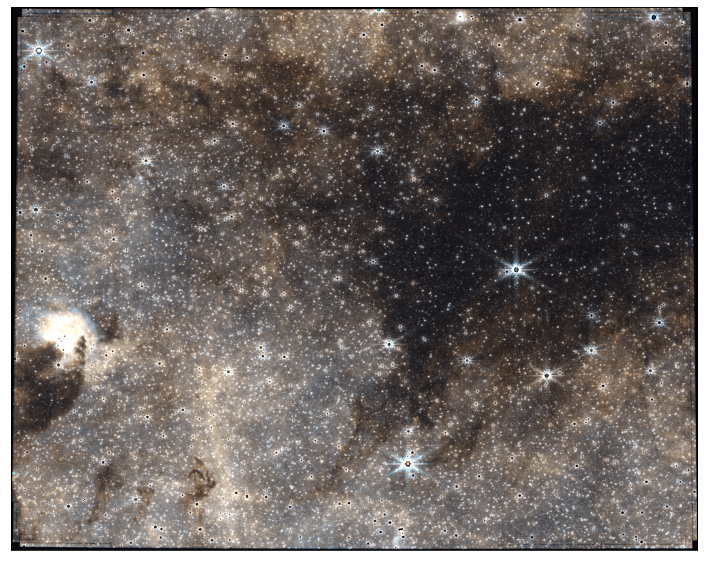

In [120]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-1, max_cut=210)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled += simple_norm(rgb[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,2])[:,:,None]
rgb_scaled *= 0.75
rgb_scaled[rgb_scaled > 1] = 1
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_nrca_longwave_narrowbandplusstars_rotated.png"
save_rgb(rgb_scaled, outfn)
AVM.embed(outfn, outfn)

In [21]:
rgbb = np.array(
      [
       fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrcb.fits'),
       fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrcb.fits'),
       fits.getdata(f'{basepath}/images/F410_minus_F405_nrcb.fits')
      ]
).swapaxes(0,2).swapaxes(0,1)
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

In [22]:
rgbbs = np.array(
      [
       fits.getdata(f'{basepath}/images/F466_refitted466wcsto410_nrcb.fits'),
       fits.getdata(f'{basepath}/images/F405_refitted405wcsto410_nrcb.fits'),
       fits.getdata(f'{basepath}/images/F410_minus_F405_nrcb.fits')
      ]
).swapaxes(0,2).swapaxes(0,1)
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

In [23]:
AVMb = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F410_minus_F405_nrcb.fits'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


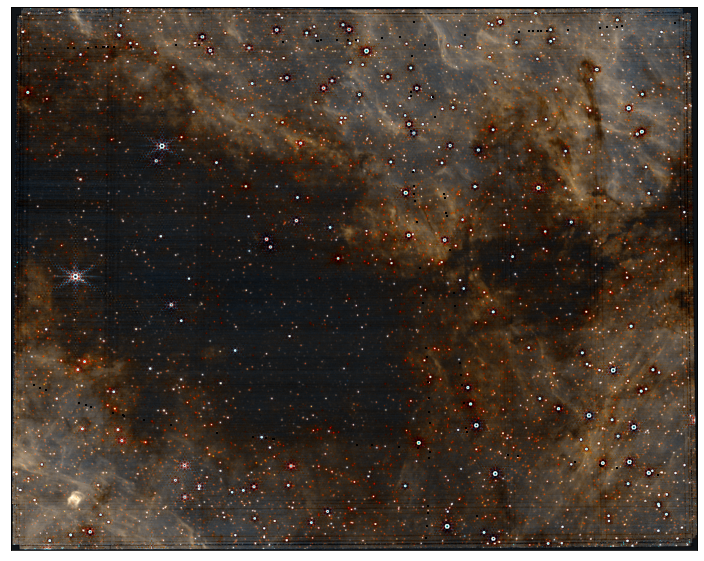

In [24]:
narrowsum = rgbb[:,:,0] + rgbb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgbb[:,:,0], stretch='asinh', min_cut=-2, max_cut=70)(rgbb[:,:,0]),
                       simple_norm(rgbb[:,:,1], stretch='asinh', min_cut=-2, max_cut=100)(rgbb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-4, max_cut=170)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_nrcb_longwave_narrowband_rotated_lighter.png"
save_rgb(rgb_scaled, outfn)
AVMb.embed(outfn, outfn)

In [25]:
narrowsum = rgbb[:,:,0] + rgbb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgbb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgbb[:,:,0]),
                       simple_norm(rgbb[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgbb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-1, max_cut=210)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
rgb_scaled += simple_norm(rgbb[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgbb[:,:,2])[:,:,None]
rgb_scaled *= 0.75
rgb_scaled[rgb_scaled > 1] = 1
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_nrcb_longwave_narrowbandplusstars_rotated.png"
save_rgb(rgb_scaled, outfn)
AVMb.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Error in callback <function flush_figures at 0x2b22e5b31280> (for post_execute):


KeyboardInterrupt: 

# try with the stars

In [26]:
narrowsum = rgbbs[:,:,0] + rgbbs[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgbbs[:,:,1], stretch='asinh', min_cut=-1, max_cut=150)(rgbbs[:,:,1]),
                       simple_norm(rgbbs[:,:,0], stretch='asinh', min_cut=-1, max_cut=135)(rgbbs[:,:,0]),
                       simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(rgbbs[:,:,2]),
]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled += simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgbbs[:,:,2])[:,:,None]
#rgb_scaled *= 0.75
#rgb_scaled[rgb_scaled > 1] = 1
# hsv = rgb_to_hsv(rgb_scaled)
# hsv[:,:,0] += 0.15  # 0.25 = 90/360
# hsv[:,:,0] = hsv[:,:,0] % 1 
# rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(10,10))
pl.imshow(rgb_scaled, origin='lower')


outfn = f"{basepath}/images/BrickJWST_nrcb_longwave_stars_rotated.png"
save_rgb(rgb_scaled, outfn)
AVMb.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Error in callback <function flush_figures at 0x2b22e5b31280> (for post_execute):



KeyboardInterrupt



In [29]:
rgbas = np.array(
      [
       fits.getdata(f'{basepath}/images/F466_refitted466wcsto410_nrca.fits'),
       fits.getdata(f'{basepath}/images/F405_refitted405wcsto410_nrca.fits'),
       fits.getdata(f'{basepath}/images/F410_minus_F405_nrca.fits')
      ]
).swapaxes(0,2).swapaxes(0,1)
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


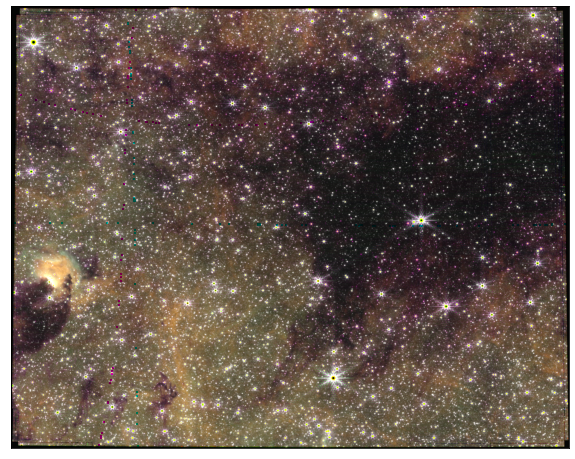

In [30]:
narrowsum = rgbas[:,:,0] + rgbas[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgbas[:,:,1], stretch='asinh', min_cut=-1, max_cut=150)(rgbas[:,:,1]),
                       simple_norm(rgbas[:,:,0], stretch='asinh', min_cut=-1, max_cut=135)(rgbas[:,:,0]),
                       simple_norm(rgbas[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(rgbas[:,:,2]),
]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled += simple_norm(rgbas[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgbas[:,:,2])[:,:,None]
#rgb_scaled *= 0.75
#rgb_scaled[rgb_scaled > 1] = 1
# hsv = rgb_to_hsv(rgb_scaled)
# hsv[:,:,0] += 0.15  # 0.25 = 90/360
# hsv[:,:,0] = hsv[:,:,0] % 1 
# rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(10,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_nrca_longwave_stars_rotated.png"
save_rgb(rgb_scaled, outfn)
AVM.embed(outfn, outfn)

In [ ]:
alpha_plus_cont = rgbbs[:,:,1] + rgbbs[:,:,2]
rgb_scaled = np.array([
                       simple_norm(rgbbs[:,:,1], stretch='asinh', min_cut=-1, max_cut=150)(rgbbs[:,:,1]),
                       simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(rgbbs[:,:,2]),
                       simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(alpha_plus_cont/2),
]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled += simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgbbs[:,:,2])[:,:,None]
#rgb_scaled *= 0.75
#rgb_scaled[rgb_scaled > 1] = 1
# hsv = rgb_to_hsv(rgb_scaled)
# hsv[:,:,0] += 0.15  # 0.25 = 90/360
# hsv[:,:,0] = hsv[:,:,0] % 1 
# rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(10,10))
pl.imshow(rgb_scaled, origin='lower')


outfn = f"{basepath}/images/BrickJWST_nrcb_longwave_stars_bra_410.png"
save_rgb(rgb_scaled, outfn)
AVMb.embed(outfn, outfn)

In [ ]:
f466_plus_cont = rgbbs[:,:,0] + rgbbs[:,:,2]
rgb_scaled = np.array([
                       simple_norm(rgbbs[:,:,0], stretch='asinh', min_cut=-1, max_cut=150)(rgbbs[:,:,0]),
                       simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(rgbbs[:,:,2]),
                       simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(f466_plus_cont/2),
]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled += simple_norm(rgbbs[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgbbs[:,:,2])[:,:,None]
#rgb_scaled *= 0.75
#rgb_scaled[rgb_scaled > 1] = 1
# hsv = rgb_to_hsv(rgb_scaled)
# hsv[:,:,0] += 0.15  # 0.25 = 90/360
# hsv[:,:,0] = hsv[:,:,0] % 1 
# rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(10,10))
pl.imshow(rgb_scaled, origin='lower')


outfn = f"{basepath}/images/BrickJWST_nrcb_longwave_stars_466_410.png"
save_rgb(rgb_scaled, outfn)
AVMb.embed(outfn, outfn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


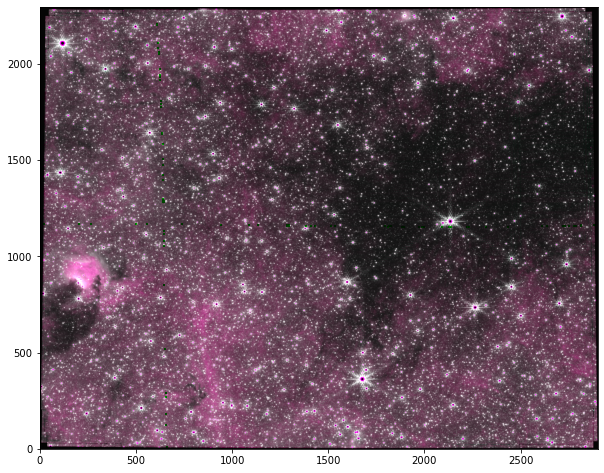

In [32]:
alpha_plus_cont = rgbas[:,:,1] + rgbas[:,:,2]
rgb_scaled = np.array([
                       simple_norm(rgbas[:,:,1], stretch='asinh', min_cut=-1, max_cut=150)(rgbas[:,:,1]),
                       simple_norm(rgbas[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(rgbas[:,:,2]),
                       simple_norm(rgbas[:,:,2], stretch='asinh', min_cut=-1, max_cut=150)(alpha_plus_cont/2),
]).swapaxes(0,2).swapaxes(0,1)
#rgb_scaled += simple_norm(rgbas[:,:,2], stretch='asinh', min_cut=-1, max_cut=120)(rgbas[:,:,2])[:,:,None]
#rgb_scaled *= 0.75
#rgb_scaled[rgb_scaled > 1] = 1
# hsv = rgb_to_hsv(rgb_scaled)
# hsv[:,:,0] += 0.15  # 0.25 = 90/360
# hsv[:,:,0] = hsv[:,:,0] % 1 
# rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(10,10))
pl.imshow(rgb_scaled, origin='lower')


outfn = f"{basepath}/images/BrickJWST_nrca_longwave_stars_bra_410.png"
save_rgb(rgb_scaled, outfn)
AVM.embed(outfn, outfn)

In [ ]:
pl.close('all')